In [1]:

import torch
import os
import torch.nn as nn     # specific functions related to neaural networks
import torch.optim as optim    #optim library which will define the optimiser 
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm     #for architecture specifics

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]
PyTorch version 2.1.2+cpu
Torchvision version 0.16.2+cpu
Numpy version 1.26.4
Pandas version 2.2.2


# Step 1. Pytorch Dataset (and Dataloader)
### Setup the dataset correctly
### It's an organized way to structure how the data and labels are loaded into the model.
### We can then wrap the dataset in a dataloader and pytorch will handle batching and shuffling the data when training the model!

In [2]:
class PlayingCardDataset(Dataset): #this will inherit from pytorches main dataset which we imported above
    
    def __init__(self,data_dir,transform=None): #data_dir=where our data is sitting and transform will resize all the images to the same size
        self.data=ImageFolder(data_dir,transform=transform) #used imagefolder class from torchvision
    
    def __len__(self):    #this is to get the length of the dataset. Dataloader eeds to know the len of dataset
        return len(self.data)
    
    def __getitem__(self,idx):   #this will get the index from the dataset and will return one item
        return self.data[idx]

    
    @property
    def classes(self):          #to return classes
        return self.data.classes

In [3]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/cards-image-datasetclassification/train'
)

In [4]:
len(dataset)

7624

In [5]:
dataset[7620]

(<PIL.Image.Image image mode=RGB size=224x224>, 52)

we can see above an image and its class

now print the images using its indexes

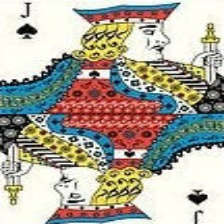

In [6]:
image,label=dataset[3000]
image

labels are represented using numbers and labels are needed for pytorch to work with them but we do not know which number is associated with each label. so we are just printing numbers and its labels in dictionary format

In [7]:
data_dir='/kaggle/input/cards-image-datasetclassification/train'

target_to_class= {v: k for k,v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

now we can connect each number to a correct label.

below 41 we can see in above dic that it is 10 of clubs

41


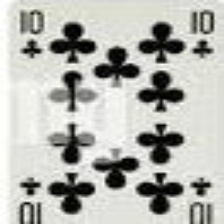

In [8]:
image,label=dataset[6000]
print(label)
image

Now we need to make sure that all the images are of the same size. because model will expect to have consistent images. to transform the images we will use transform function which we imported using torchvision. 


We are going to keep all images to 128, 128 and then convert all the of them to pytorch tensor

In [9]:
transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),

])

data_dir='/kaggle/input/cards-image-datasetclassification/train'
dataset = ImageFolder(root=data_dir, transform=transform)
# PlayingCardDataset(data_dir,transform)

In [10]:
image,label=dataset[100]
image.shape

torch.Size([3, 128, 128])

3 is number of channels like red,green,blue 128 128 height and width

Dataloaders

Batching our dataset

It's faster to train the model in batches instead of one at a time.

we will create a dataloader where we will create batches of the dataset. we will keep shuffle True because we want to shuffle the data very time we pick up data. we do shuffling on train data and not on test and validation data.

In [11]:
dataloader=DataLoader(dataset,batch_size=32,shuffle=True)

In [12]:
for images,label in dataloader:
    break

In [13]:
images.shape, label.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

above we can see now 32. 32 represents the batches of images. one batch of 32 images. labels size 32 meaning one dimension has 32 different labels.

In [14]:
label

tensor([17, 16, 32,  5, 23, 29,  4, 24,  1, 14, 38, 30, 48,  1, 19, 25, 38, 40,
        41, 21, 21, 30,  8, 42, 38, 31, 16,  1, 13, 48, 30, 20])

so labels are randomly selected so everytime you run for loop above we will get different values for labels.

# Step 2. Pytorch Model

Pytorch datasets have a structured way of organizing your data, pytorch models follow a similar paradigm.

We could create the model from scratch defining each layer.

However for tasks like image classification, many of the state of the art architectures are readily available and we can import them from packages like timm.

Understanding the pytorch model is all about understanding the shape the data is at each layer, and the main one we need to modify for a task is the final layer. Here we have 53 targets, so we will modify the last layer for this.

In [15]:
import requests
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53): #number of classes or total cards are 53
        
        #initializing object which will have everything from parent class
        super(SimpleCardClassifer, self).__init__()
        
        
    # Load the model with the locally uploaded weights
        model_path = '/kaggle/input/model-path/efficientnet_b0_ra-3dd342df.pth'
        
        
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=False)
        self.base_model.load_state_dict(torch.load(model_path))
        
        #we are using efficientnet_b0 model architecture where b0 is the size of the model. 
        #B0 is the smallest one
        #pretrained = True means model has already been trained using image dataset
        
        
        #base model has an additional layer which we will have to remove 
        #we are removing the last layer 
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        #efficientnet_b0 will give output of feature size 1280. but we want output of 
        #featuture size 53 so we will have to resize it to 53. so for that we will create
        # a classifier

        enet_out_size = 1280
        # Make a classifier
        self.classifier =nn.Linear(enet_out_size, num_classes)
#         = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(enet_out_size, num_classes) #using linear function convert enet_out_size (1280) to num_classes(53)
#         )
    
    def forward(self, x):
        # we get examples or samples and Connect these parts and return the output (classify)
        x = self.features(x)
        output = self.classifier(x)
        return output

In [16]:
model=SimpleCardClassifer(num_classes=53)

In [17]:
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


now let's see if our model is accepting the image data

In [18]:
example_output=model(images) #imagee we found using the for loop on dataloader
example_output.shape

torch.Size([32, 53])

32,53 - 32 is our batch size and 53 are total number of classes

# Step 3. The training loop

here we are going to feed this data into the model many times. and then will apply loss function to the outputs we have received. 

we will do this in batches. 

epoch refers to one complete pass through the entire training dataset. During an epoch, the learning algorithm processes every sample in the training set once and adjusts the model parameters based on the error. Multiple epochs are typically required to train a model effectively.

here we have one epoch where we run all the batches in one training dataset

In [19]:
#get the most commonly used loss function for classification purpose
criterion=nn.CrossEntropyLoss()

#we are going to take optimizer from pytorch's optim library adam, adam works really well. 
# we need to define learning rate and add model.parameters()

optimizer=optim.Adam(model.parameters(),lr=0.001)

lets check if it is working with out model

In [20]:
criterion(example_output,label)
print(example_output.shape, label.shape)

torch.Size([32, 53]) torch.Size([32])


In [21]:
tranform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

train='/kaggle/input/cards-image-datasetclassification/train'
test='/kaggle/input/cards-image-datasetclassification/test'
valid='/kaggle/input/cards-image-datasetclassification/valid'

train_dataset=PlayingCardDataset(train, transform=transform)
test_dataset=PlayingCardDataset(test, transform=transform)
valid_dataset=PlayingCardDataset(valid, transform=transform)

train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)
val_loader=DataLoader(valid_dataset,batch_size=32,shuffle=False)

In [22]:
# Simple training loop

##we are using GPU to train the model faster
num_epochs = 5 #one epoch will run the training data once 
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):  #loop through our training dataloader to train the model
    #  #set the model to train
    model.train()
    running_loss = 0.0
    #now we will loop through the training data loader
    for images, labels in tqdm(train_loader, desc='Training loop'): ## we have used tqdm just to get the progress bar in output as we run the model
        
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #back propagation on model which will update the model weights
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
        
        #once this inner loop is completed one epoch is done
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    
     #now same we have to do on validation dataset
    model.eval()
    running_loss = 0.0
    with torch.no_grad(): #to make sure model weights are not touched
        for images, labels in tqdm(val_loader, desc='Validation loop'): ##we have used tqdm just to get the progress bar in output as we run the model
            
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
            
             #once this inner loop is completed one epoch is done
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.5932186347865358, Validation loss: 0.582924931904055


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5788177383158665, Validation loss: 0.17338186749872173


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.3478926721362227, Validation loss: 0.20808177286723875


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.25094966382444966, Validation loss: 0.21057670836178763


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.20133332544615237, Validation loss: 0.1935652714855266


Visualize Losses

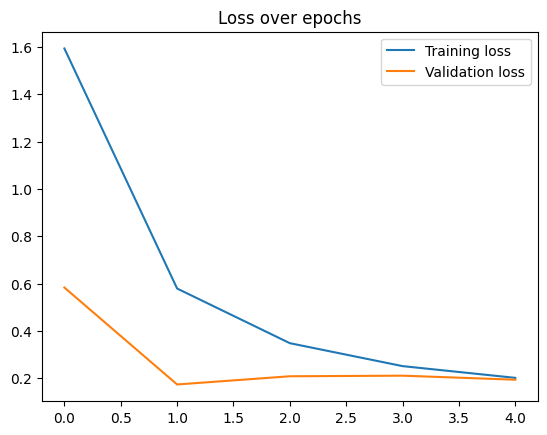

In [23]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

Evaluating the Results

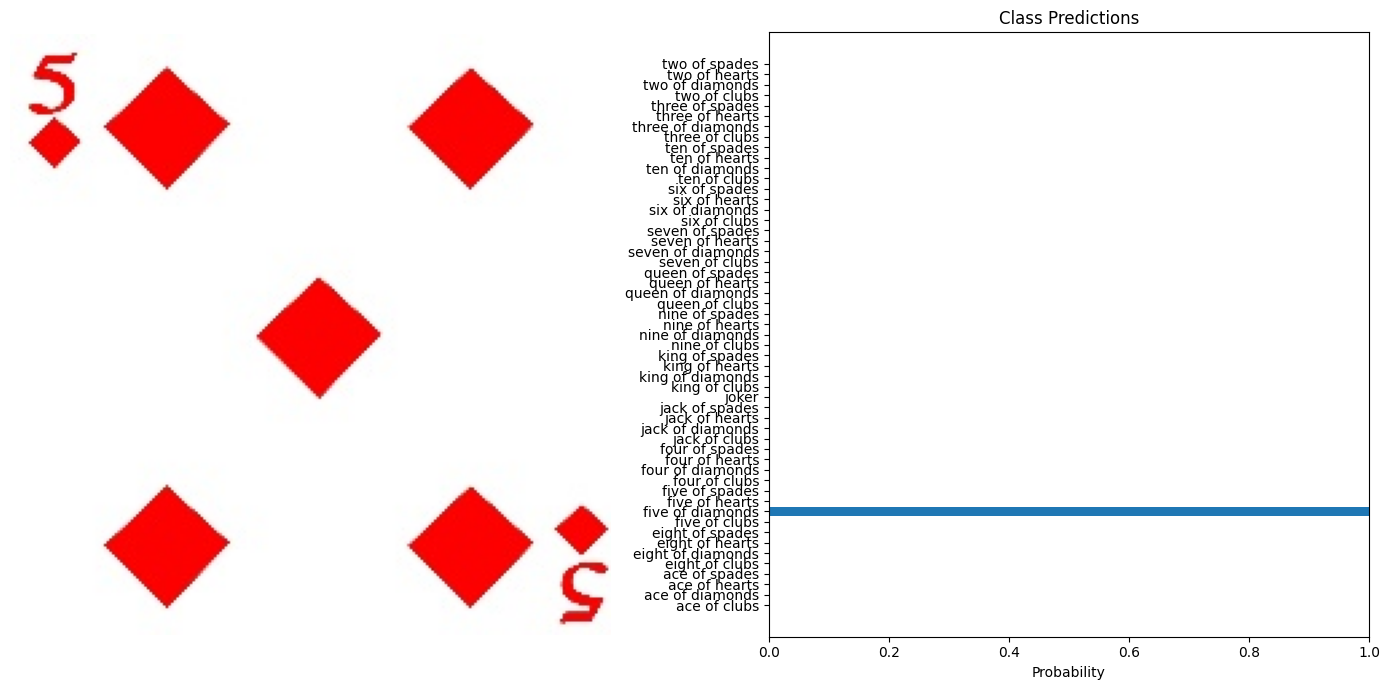

In [24]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
test_image = "/kaggle/input/cards-image-datasetclassification/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)

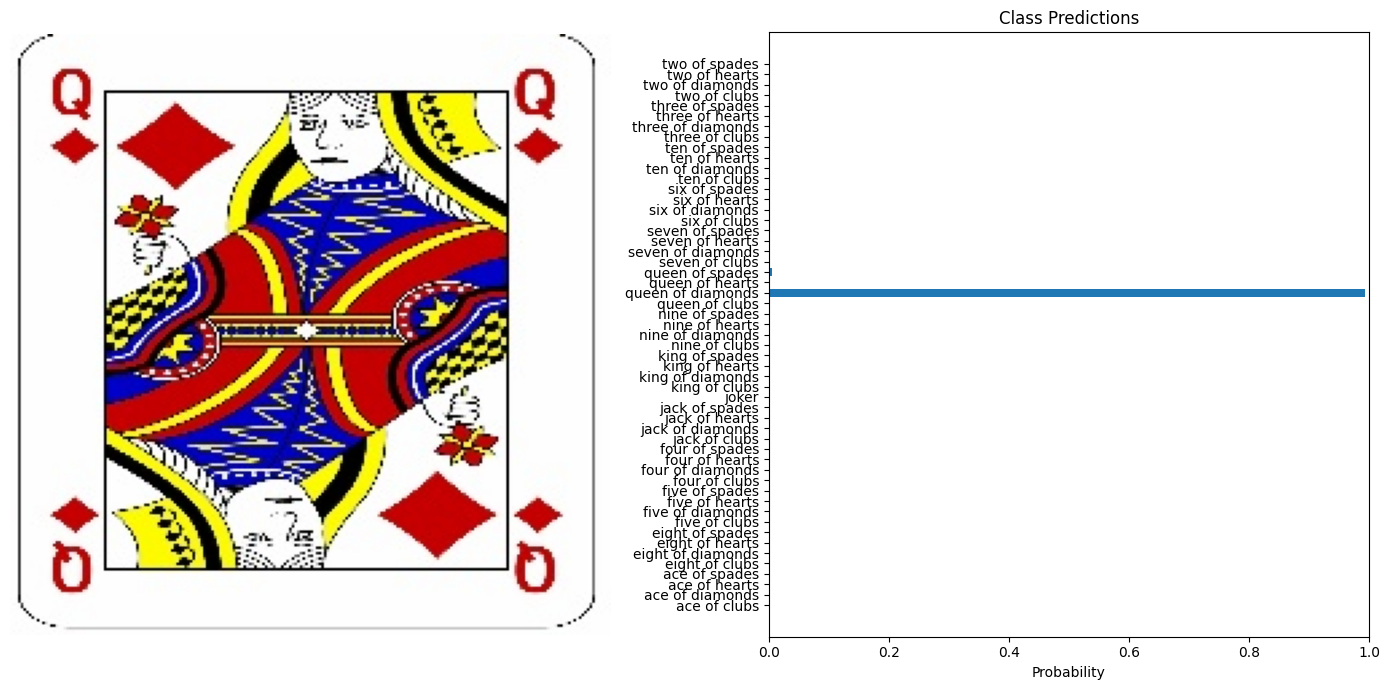

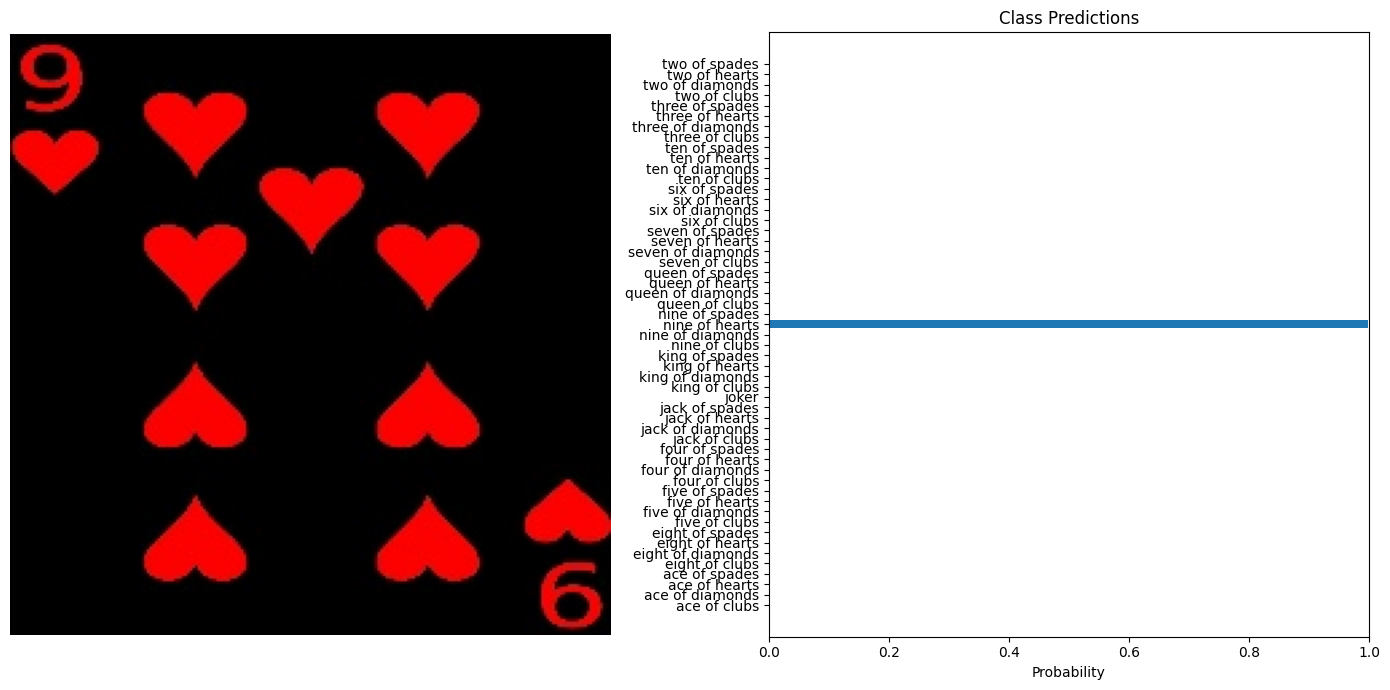

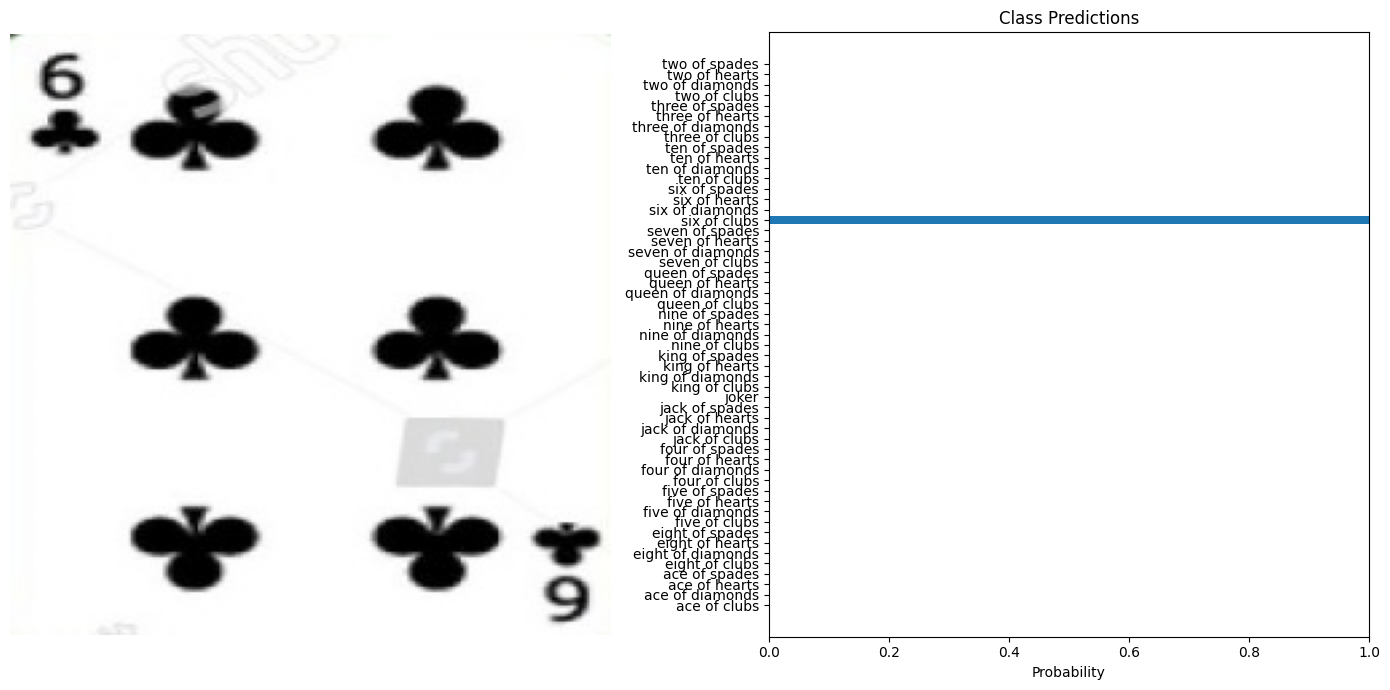

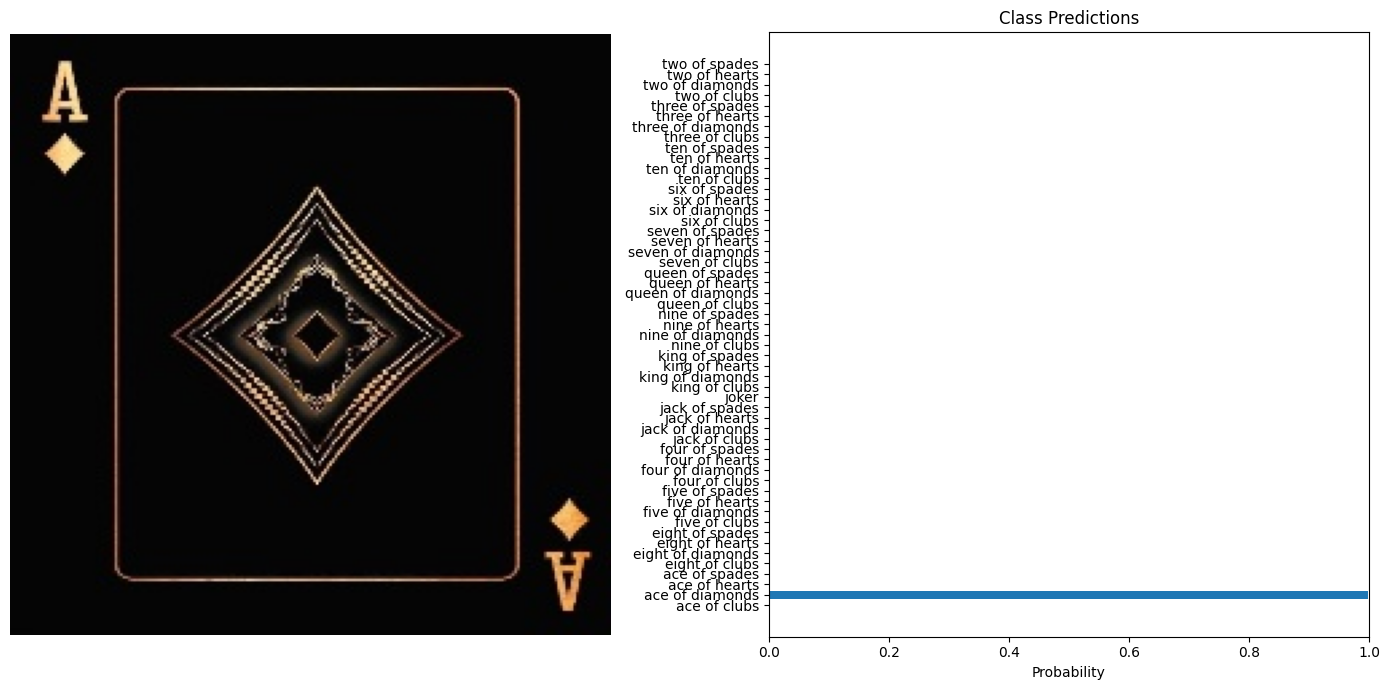

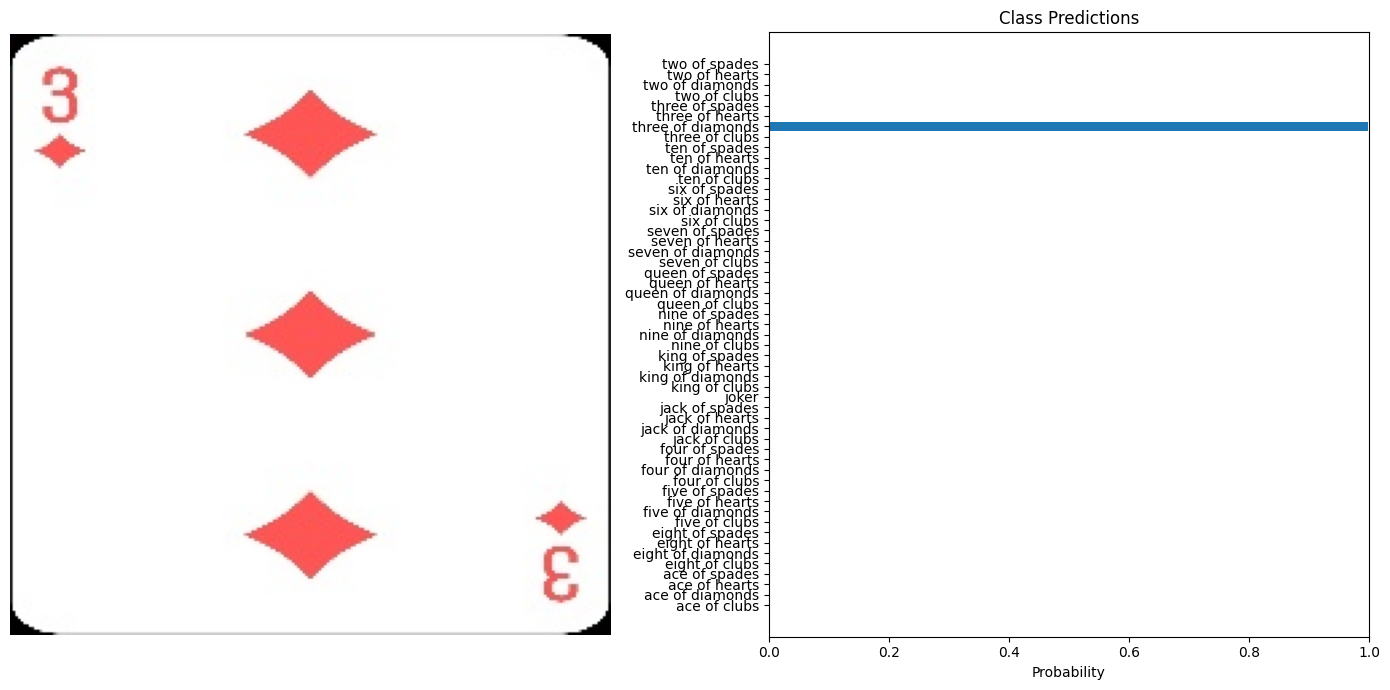

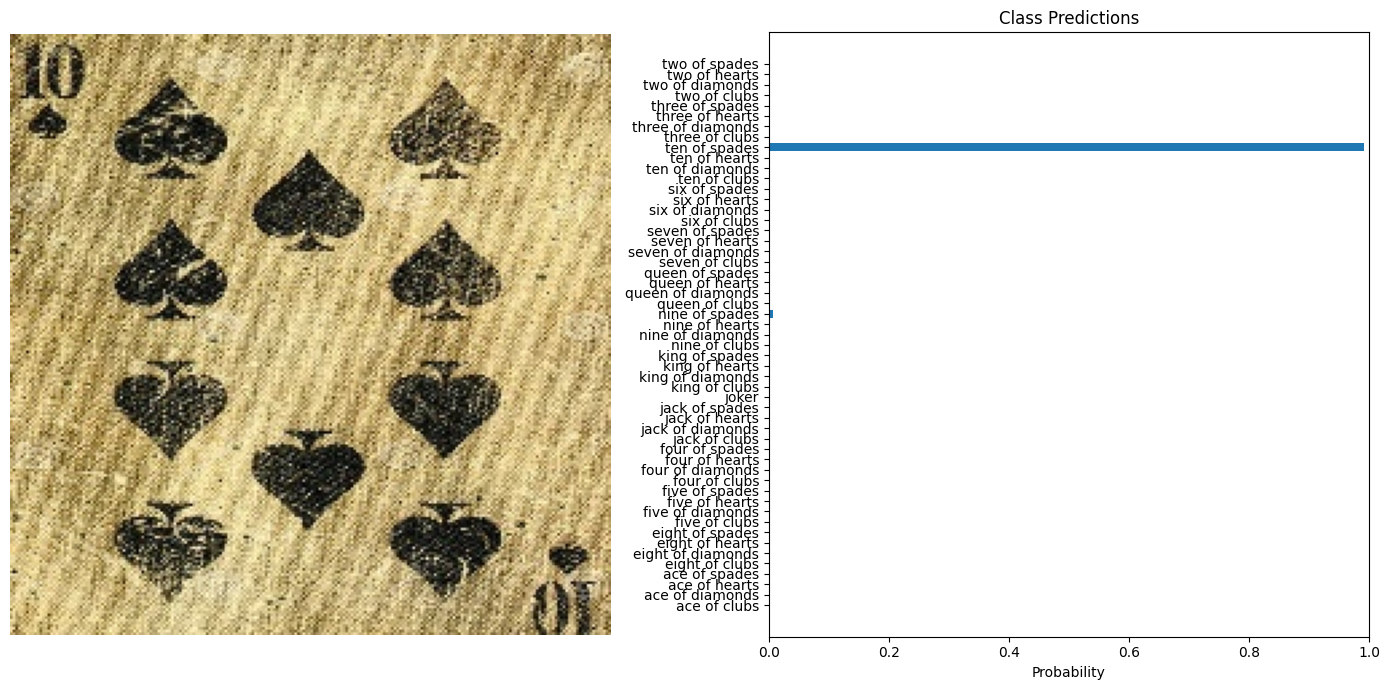

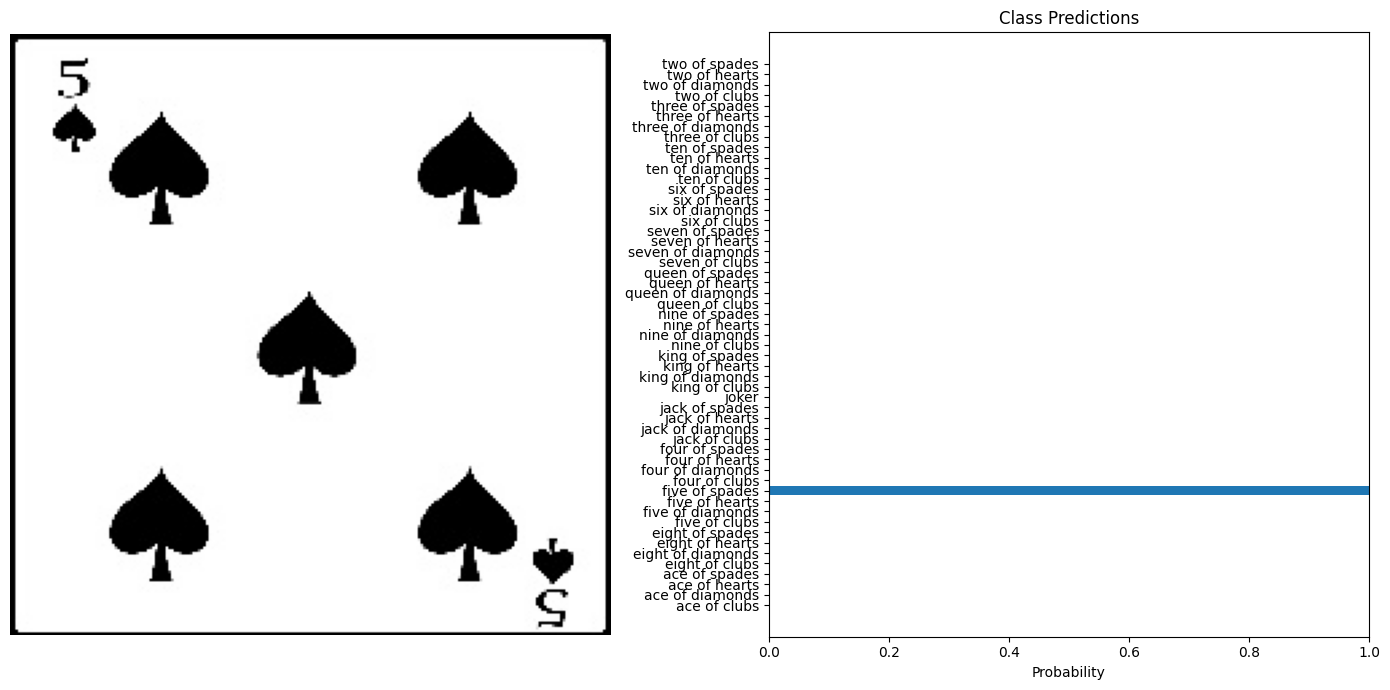

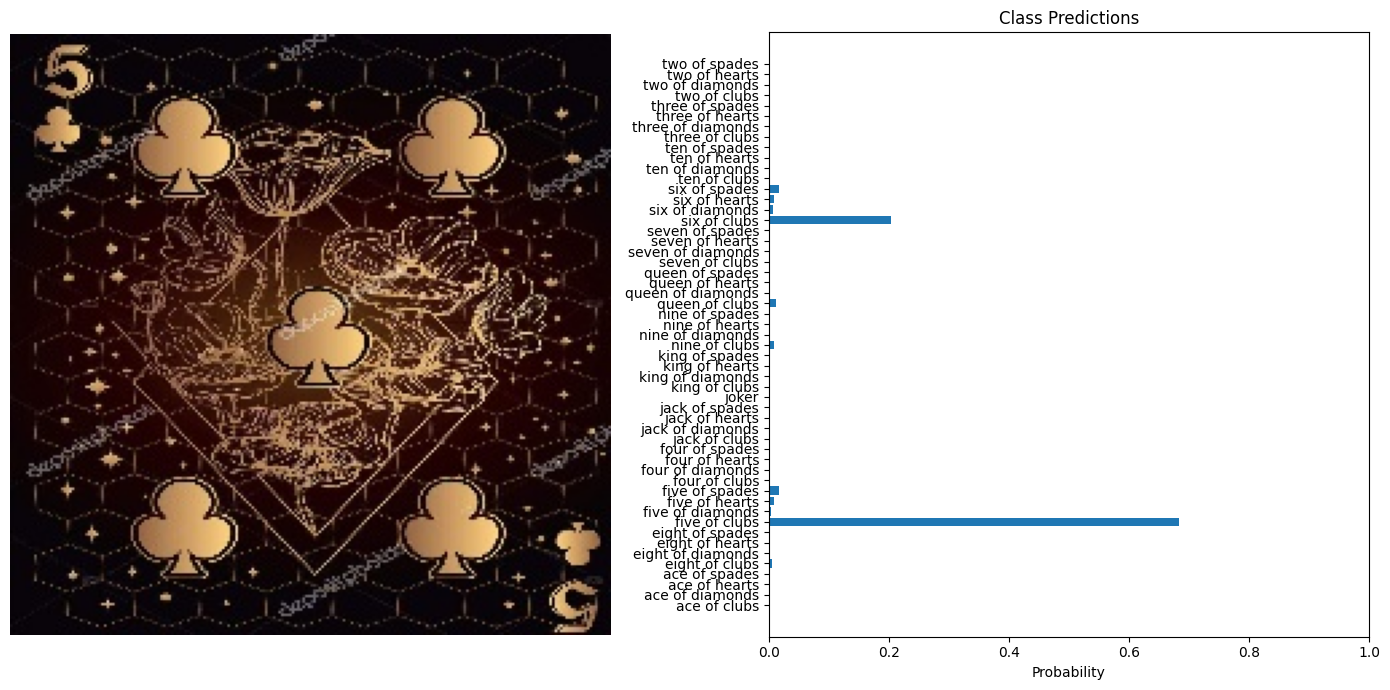

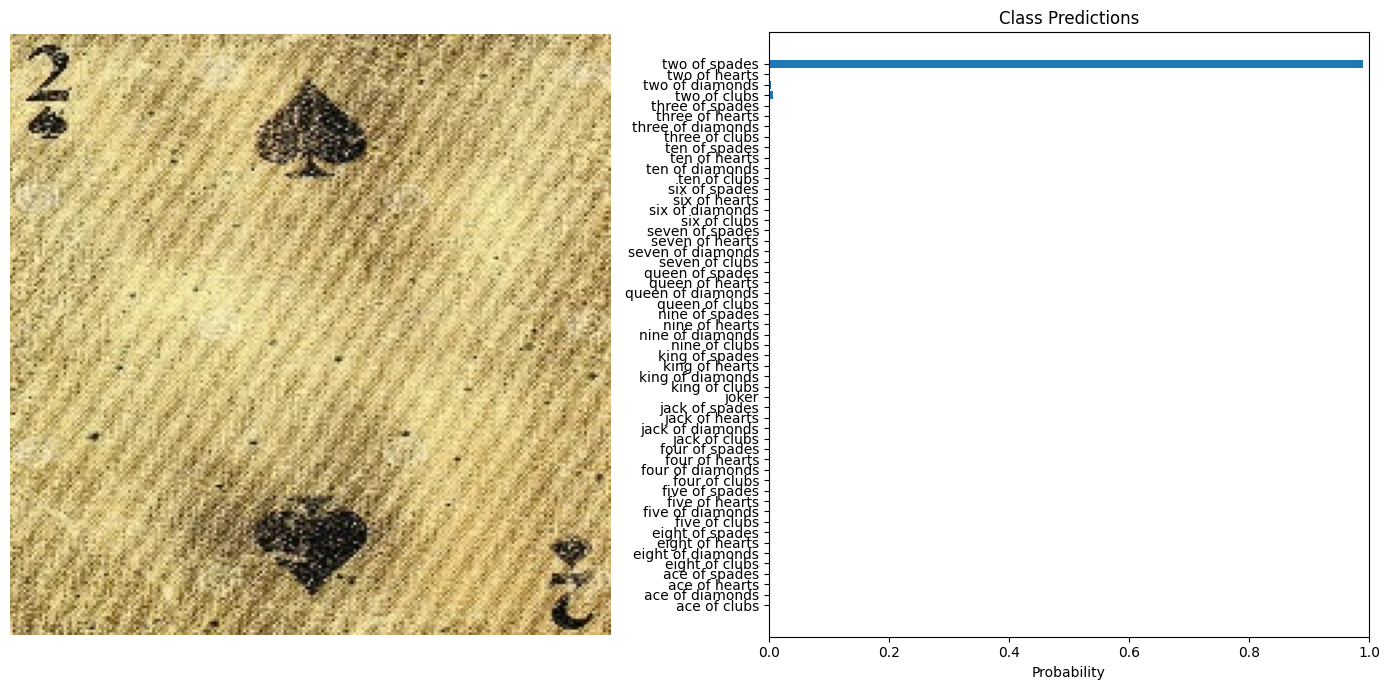

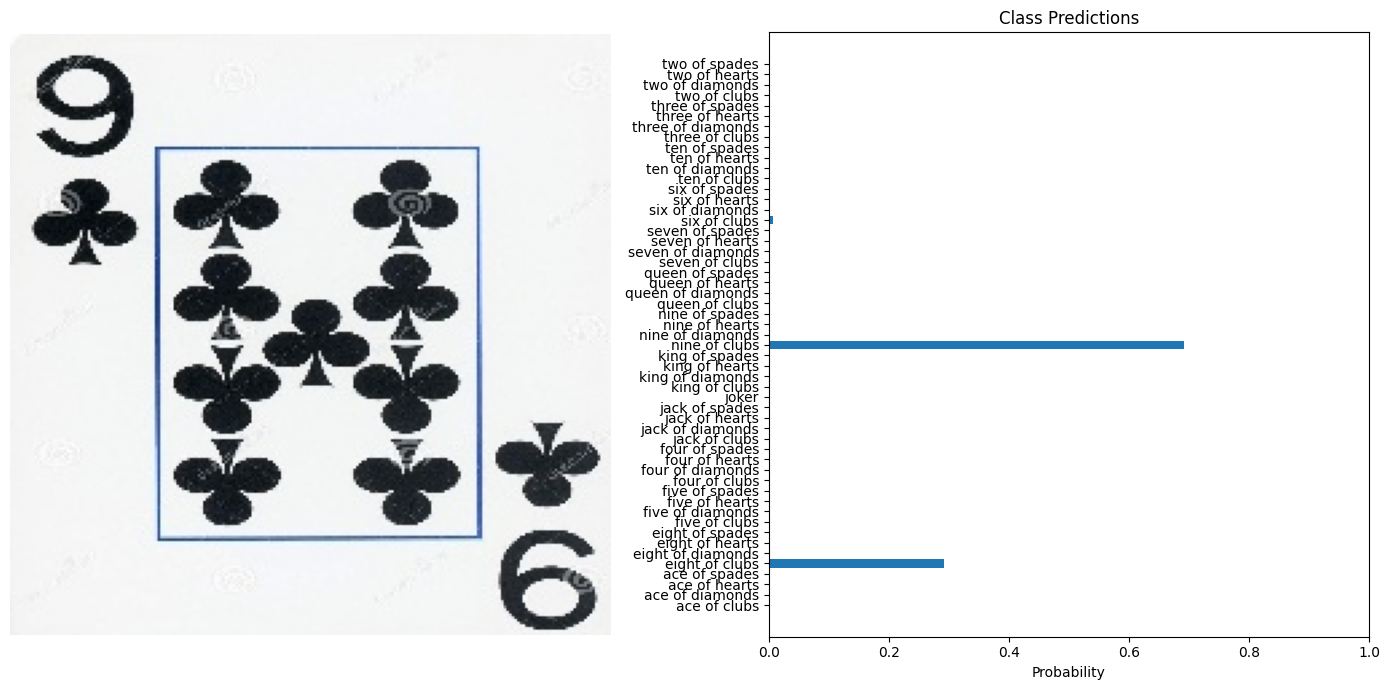

In [25]:
from glob import glob
test_images = glob('/kaggle/input/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)